In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import one_hot

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
os.listdir('drive/My Drive/Projects/gene_exp_rna_seq')

['data.csv', 'labels.csv', 'labels.gsheet', 'Split1_60_40']

In [5]:
data = pd.read_csv('drive/My Drive/Projects/gene_exp_rna_seq/data.csv',delimiter=',')


In [6]:
labels = pd.read_csv('drive/My Drive/Projects/gene_exp_rna_seq/labels.csv',delimiter=',')

In [7]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,0.688177,0.955504,2.667291,0.318108,0.214608,0.005879,0.003002,0.035498,2.204436,9.078900,3.286125,2.556424,8.266450,0.0,0.105504,0.526534,2.722476,9.209380,4.673866,6.182851,2.139337,1.168574,6.789898,2.284279,13.711217,8.545217,1.123570,0.202338,9.497384,1.363294,...,9.793412,10.284857,6.079328,7.945613,0.371288,4.905456,7.366911,7.049196,9.628212,2.354619,5.796625,7.744818,6.825166,3.859964,8.791191,8.045218,1.051505,6.031472,1.217945,8.147243,0.044261,6.856778,8.517432,7.347510,8.561671,8.021405,7.314292,8.687859,8.324222,8.788809,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,1.173568,0.877319,0.705767,0.673289,0.396474,0.065316,0.038493,0.192218,3.194977,1.203502,1.137231,2.448633,1.220976,0.0,0.411554,0.703966,2.667242,0.740969,2.049775,1.568571,3.160784,1.665570,0.857483,2.721062,1.272811,1.380301,1.369473,0.609529,0.425283,1.882621,...,0.503487,0.458172,0.811543,0.617257,0.757676,1.075023,0.809643,0.714542,1.376309,1.877525,0.893885,0.490483,0.485472,1.832004,0.524364,0.601594,1.264554,0.643518,0.697974,0.514244,0.175399,0.608048,0.743320,1.505049,0.636755,0.644683,0.576918,0.542212,0.823877,1.265211,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.437228,0.000000,0.000000,4.190164,0.0,0.000000,0.000000,0.000000,6.200934,0.000000,2.203890,0.000000,0.000000,4.238290,0.000000,9.378178,4.094641,0.000000,0.000000,7.191099,0.000000,...,8.113831,8.897349,2.583086,5.264987,0.000000,1.573908,4.253021,4.640604,4.383186,0.000000,1.066881,5.304664,5.124647,0.000000,6.729838,4.322945,0.000000,3.488194,0.000000,6.355971,0.000000,4.686904,5.555325,0.000000,5.709908,4.567479,0.000000,6.655299,6.294446,4.077841,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,0.000000,0.395831,2.243852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.286530,2.589260,0.000000,7.611490

In [8]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,0.0,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.0,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.0,9.646323,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.0,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,0.0,0.0,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.0,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.0,9.670731,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.0,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,0.0,0.0,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.0,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.0,9.587569,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991148,8.153248,7.508444,4.586531,9.152227,8.227717,0.360982,6.227104,0.649386,8.151879,0.0,6.558289,8.673708,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9

In [9]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [10]:
data.isnull()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [11]:
data['Unnamed: 0']

0        sample_0
1        sample_1
2        sample_2
3        sample_3
4        sample_4
          ...    
796    sample_796
797    sample_797
798    sample_798
799    sample_799
800    sample_800
Name: Unnamed: 0, Length: 801, dtype: object

In [12]:
labels['Unnamed: 0']

0        sample_0
1        sample_1
2        sample_2
3        sample_3
4        sample_4
          ...    
796    sample_796
797    sample_797
798    sample_798
799    sample_799
800    sample_800
Name: Unnamed: 0, Length: 801, dtype: object

In [13]:
#split into Train Validation and Test Samples ....... How do you wanna do it ... using a prebuilt function or mannually  ..? your choice .. 
#so lets look up for some function which randomly samples so its easy for everyone 
# We Need to  join both  the labels and the data file cause it would be stupid if we just split the train data seperately from the labels of train data .
# so lets join first and then use the sklearn fucntion of splitting
#so join them on the unnamed column and we need the Class in the dataset that we missed last time (this one)

In [14]:
labels['Class']

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

In [15]:
# so we will change the datatype of the labels class to numeric values so we can use one hot encoder or to categorical 
# hope the video lag error in connection dint missed out something 

In [16]:
labels = labels.replace({'PRAD': 0})

In [17]:
labels['Class']

0         0
1      LUAD
2         0
3         0
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799       0
800       0
Name: Class, Length: 801, dtype: object

In [18]:
labels['Class'].unique()

array([0, 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [19]:
#dont forget to start with zero ... hope this method works with to_categorical

In [20]:
labels = labels.replace({'LUAD': 1})
labels = labels.replace({'BRCA': 2})
labels = labels.replace({'KIRC': 3})
labels = labels.replace({'COAD': 4})

In [21]:
labels['Class'].unique()

array([0, 1, 2, 3, 4])

In [22]:
df = pd.DataFrame(data)

In [23]:
#df.join(labels.set_index('Unnamed: 0'), on='Unnamed: 0') # we neewd to change this ................... 
df = pd.merge(df, labels, left_on='Unnamed: 0', right_on='Unnamed: 0', how='left').drop('Unnamed: 0', axis=1)

In [24]:
df

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.000000,0.0,0.000000,0.000000,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.000000,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.000000,9.833458,0.000000,...,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.000000,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.000000,0.0,0.000000,0.000000,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.000000,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.000000,9.533302,0.811142,...,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.000000,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,1
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.000000,0.0,0.000000,0.000000,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.000000,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.000000,9.646323,0.452595,...,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.000000,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.000000,0.0,0.000000,0.000000,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.000000,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.000000,9.670731,0.434882,...,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.000000,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.000000,0.0,0.000000,0.000000,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.000000,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.000000,9.587569,0.649386,...,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991148,8.153248,7.508444,4.586531,9.152227,8.227

In [25]:
#notice that we have also dropped the labeling of individual samples but it will be fine since we have unique samples and we have the entries from 0 to 800 respectively of each samples

In [26]:
train, test = train_test_split(df, test_size=0.4, random_state=42, shuffle=True)

In [27]:
#keep in mind that you would need to save this data so that your project is recreateable the same way 
#so now save the train and test files in your repository or drive  ( cause they are randomly sampled)

In [28]:
#os.mkdir('drive/My Drive/Projects/gene_exp_rna_seq/Split1_60_40')
os.listdir("drive/My Drive/Projects/gene_exp_rna_seq")

['data.csv', 'labels.csv', 'labels.gsheet', 'Split1_60_40']

In [29]:
train_path = os.path.join('drive/My Drive/Projects/gene_exp_rna_seq/Split1_60_40','train.csv')
test_path = os.path.join('drive/My Drive/Projects/gene_exp_rna_seq/Split1_60_40','test.csv')

In [30]:
train.to_csv(train_path, sep=',', index=False)
test.to_csv(test_path, sep=',', index=False)

In [31]:
# i Chose test as 40 percent as 20 percent will be for validation and other 20 % for evaluatation 
#so we will split it again .. remember now that when you use the function you use 0.5 cause u need to make half of it 
# the Random State is just same as applying the seed
# if u feel this is video goin slow feel free to increase the speed to 1.5 x 

In [32]:
test , valid = train_test_split(test,test_size=0.5,random_state=42,shuffle=True)

In [33]:
test_path = os.path.join('drive/My Drive/Projects/gene_exp_rna_seq/Split1_60_40','test.csv')
valid_path = os.path.join('drive/My Drive/Projects/gene_exp_rna_seq/Split1_60_40','valid.csv')

In [34]:
# we are just rewritnig the test file here

In [35]:
test.to_csv(train_path, sep=',', index=False)
valid.to_csv(valid_path, sep=',', index=False)

In [36]:
#we would have to change the below code since we dropped that column column # so i forgot to save day 0 notebook in git gub  but will save from day 1 


In [37]:
print("Number of example in Training set " + str(train['Class'].count()));
print("Number of example in Test set "+ str(test['Class'].count()));
print("Number of example in Valid set "+str(test['Class'].count()))

Number of example in Training set 480
Number of example in Test set 160
Number of example in Valid set 160


In [38]:
#okay so atleast we are 1/4 way now 
#now do you want to split the train data into lavels and features or work as it is ..? 
# tensorflow can work with both together .. but for simplicity sake lets seperate them again into train_labels and train_features 
# do the same for validation data and test data ... 
# so recorrecting the mistakes we made yesterday .. sorry for that

In [39]:
train_labels = train['Class']
del train['Class']
train_features = train

In [40]:
test_labels = test['Class']
del test['Class']
test_features = test

valid_labels = valid['Class']
del valid['Class']
valid_features = valid


In [41]:
valid_labels#;valid_features
#train_labels;train_features

381    3
81     0
181    3
456    1
76     2
      ..
711    3
737    2
467    2
703    3
518    1
Name: Class, Length: 161, dtype: int64

In [42]:
# so now it is the time to analzise the data ...... See whats there in each row and how are the vlaues ... do they neeed to be normalized . and plot them maybe ... f
#and deduce statstical inference .. 

In [43]:
len(train_features.columns)

20531

In [44]:
# so thats a lot of features ... basically 20531 features .. omg okay .. not a good idea to plot them 
# i'm thinking for now maybe passs them on directly and seee if model works out ..lol and we do it in other rounf to improve it 
# so as our problem is classification we neeed to one hot encode our labels ..  so we check how many unique values are there in pandas so that many categories
#actually im not used to pandas so i have google the syntax but ts easy
#so we have missed out the main class thing while combining so we might have to just run it again --- So we merge it propely today 20-10-2020

In [45]:
train_labels

257    0
766    4
544    2
15     2
3      0
      ..
71     2
106    1
270    3
435    3
102    2
Name: Class, Length: 480, dtype: int64

In [46]:
# lets see how many classes we have and conform that 

In [47]:
labels['Class'].unique()

array([0, 1, 2, 3, 4])

In [48]:
# so we have 5 classes in total , that mean are final output layers myst have 5 neurons 
#now its time to make them categorical data so we use the util from keras
#but first we might need to convert it into nummpy array from pandas

In [49]:
train_labels = pd.DataFrame(train_labels).to_numpy()

In [50]:
train_labels.shape

(480, 1)

In [51]:
# we may need to do it for all out trin and test set so lets do 
# also remebemr that dont run that cell twice cause it will add and additional dimension somethime (np.array(array) this one) 

In [52]:
test_labels = pd.DataFrame(test_labels).to_numpy()
valid_labels = pd.DataFrame(valid_labels).to_numpy()
train_features = pd.DataFrame(train_features).to_numpy()
test_features = pd.DataFrame(test_features).to_numpy()
valid_features = pd.DataFrame(valid_features).to_numpy()

In [53]:
# no to categorical for labels .. try with one first 
# so to_categorical need numeric value .. lets try with one hot encod or else we convert them to numeric values ourself 
# so we might have to convert all this into numeric values  and i have never done it before so its gonna be lot of googleuing about the pandas syntax
# we might just do it at the begining of the notebook so its easy

In [54]:
train_labels_categorical = to_categorical(train_labels,5)
train_labels_one_hot = tf.keras.backend.one_hot(train_labels, 5)

In [55]:
train_labels_categorical.shape

(480, 5)

In [56]:
valid_labels_categorical = to_categorical(valid_labels,5)
test_labels_categorical = to_categorical(test_labels,5)

In [57]:
# so both of them works the same way ,, but one_hot method give a tensorflow array type while to_categorical givews a numpy array

In [58]:
train_features[0]

array([ 0.        ,  4.39652943,  4.15279185, ..., 10.21771541,
        4.3483245 ,  0.30591217])

In [59]:
# so our our one single input has 20531 fetaures 
# now should we normalize the data ..? or keep it as it is ..?
# normalizing might be better since the model would then get a better idea about the relation 
# so lets try normalizing with tensorflow numpy array 
# we will normalize along the vertical axis that is for each gene # i often get confuse with axis = 0 and 1 so lets try and see
# the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1).
# So we follow this

In [60]:
train_features

array([[ 0.        ,  4.39652943,  4.15279185, ..., 10.21771541,
         4.3483245 ,  0.30591217],
       [ 0.        ,  3.35133151,  3.51227746, ...,  9.57867082,
         4.95142927,  0.        ],
       [ 0.        ,  2.6513158 ,  2.25794595, ..., 10.39690442,
         5.96270633,  0.        ],
       ...,
       [ 0.        ,  2.52839628,  2.62030488, ...,  9.27967093,
         4.18972969,  0.        ],
       [ 0.        ,  4.13419629,  3.7226081 , ..., 10.02350487,
         6.3917093 ,  0.        ],
       [ 0.        ,  2.99048296,  2.48735772, ..., 10.17624796,
         6.94138806,  0.        ]])

In [61]:
train_feature_norm = tf.keras.utils.normalize(train_features, axis=0, order=2)

In [62]:
train_feature_norm.shape

(480, 20531)

In [63]:
test_feature_norm = tf.keras.utils.normalize(test_features, axis=0, order=2)
valid_feature_norm = tf.keras.utils.normalize(valid_features, axis=0, order=2)

In [64]:
# so yooyyo here we have finished half of our project .. categorized  and normalized .. now just model building  
# we could have done this before splitting the data set also but we dint see that comming ,,, i guess its better to do this there but we would have to 
#look up for normalize function in pandas while its easy in keras api so .... either way things are easy 

In [69]:
# so lets make a mdoel today .... lets make a simple one first and lets see how it works ..
# theres no hard and fast rule to make the perfect model in the first time so will try with many different parameters and store it and see which one goes well
# so ... we have the input of the shape 20531 ....  first let me just try and see it the model works well like is the sytanx right ... i dont want many errors at the end
# So im gonna keep cheking it and so i'll make each layer mainly the first and compile it once and run it through a single epoch to see if its accepting the  data
# so it adds a None layer by it self for each unit so we might not need to add the none

In [86]:
# also we should add a callback to save the model ..  for the best weights depending on the validation loss  
#also we are not adding any kernel regularizers right now as this is just a base model 

In [89]:
def model_1():
  model = tf.keras.Sequential([
                               tf.keras.layers.Dense(32,activation='relu',input_shape=(20531,),name='dense1_32'),
                               tf.keras.layers.Dense(64,activation='relu',name='dense1_64'),
                               tf.keras.layers.Dense(128,activation='relu',name='dense1_128'),
                               tf.keras.layers.Dense(128,activation='relu',name='dense2_128'),
                               tf.keras.layers.Dense(5,activation='softmax',name='last')
  ])
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  # you can choose a vide variety of optimizer and loss ..... for now we just go with the most basic one 
  #explore tensor flow site for more

  model.summary()

  return model

In [79]:
os.mkdir('drive/My Drive/Projects/gene_exp_rna_seq/model_1/saved')
os.listdir('drive/My Drive/Projects/gene_exp_rna_seq')

['data.csv', 'labels.csv', 'labels.gsheet', 'Split1_60_40', 'model_1']

In [88]:
# we are saving the whole architecture right now just in case we mess up and dont remember it 
# since we plan to do multiple run we might add another folder but this is fine for now 

In [80]:
checkpoint_path = 'drive/My Drive/Projects/gene_exp_rna_seq/model_1/saved'
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,monitor='val_loss',save_best_only=True,save_weights_only=False)

In [90]:
model_1 = model_1()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1_32 (Dense)            (None, 32)                657024    
_________________________________________________________________
dense1_64 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense1_128 (Dense)           (None, 128)               8320      
_________________________________________________________________
dense2_128 (Dense)           (None, 128)               16512     
_________________________________________________________________
last (Dense)                 (None, 5)                 645       
Total params: 684,613
Trainable params: 684,613
Non-trainable params: 0
_________________________________________________________________


In [94]:
history_1 = model_1.fit(train_feature_norm,train_labels_categorical,epochs=50,validation_data=(valid_feature_norm,valid_labels_categorical),callbacks=[cp_callback])

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 1.5245 - accuracy: 0.3604WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: drive/My Drive/Projects/gene_exp_rna_seq/model_1/saved/assets
15/15 [==============================] - 1s 72ms/step - loss: 1.5245 - accuracy: 0.3604 - val_loss: 1.3474 - val_accuracy: 0.3851
Epoch 2/50
15/15 [==============================] - 1s 56ms/step - loss: 1.1122 - accuracy: 0.4854 - val_loss: 0.4962 - val_accuracy: 0.7578
Epoch 3/50
15/15 [==============================] - 1s 56ms/step - 

In [95]:
# welll i have never achieved accuracy 1 so fast ever .. this is wierd hope we passed in properly .. 
# lets check out the graph for now

In [104]:
def plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs,acc,'b')
  plt.plot(epochs,val_acc,'r')
  plt.xlabel('Training Accuracy')
  plt.xlabel('Validation Accuracy')
  plt.figure()
  plt.show()

  plt.plot(epochs,loss,'b')
  plt.plot(epochs,val_loss,'r')
  plt.xlabel('Training Loss')
  plt.xlabel('Validation Loss')
  plt.figure()
  plt.show()


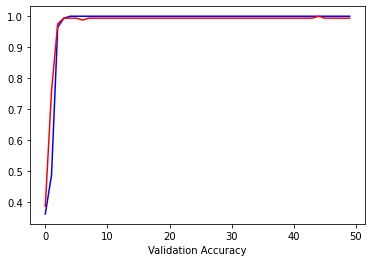

<Figure size 432x288 with 0 Axes>

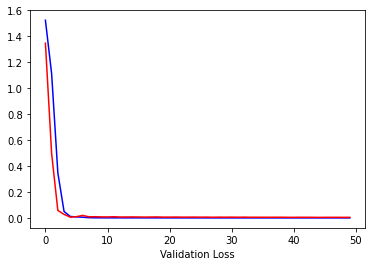

<Figure size 432x288 with 0 Axes>

In [105]:
plot(history_1)

In [108]:
print(model_1.metrics_names)

['loss', 'accuracy']


In [109]:
loss1 , accuracy1 = model_1.evaluate(valid_feature_norm,valid_labels_categorical)

6/6 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9938


In [110]:
print(loss1 , accuracy1)

0.004643668886274099 0.9937888383865356


In [111]:
# but i think so much accurate model may not work too much well with the real world data as it now seems as the model is remebering 
# so maybe lets reduce it to 90-95 percent accuracy maybe

In [172]:
def model_2():
  model = tf.keras.Sequential([
                               tf.keras.layers.Dense(32,activation='relu',input_shape=(20531,),name='dense1_32'),
                               tf.keras.layers.Dense(64,activation='relu',name='dense1_64'),
                               tf.keras.layers.Dense(64,activation='relu',name='dense2_64'),
                               tf.keras.layers.Dense(5,activation='softmax',name='last')
  ])
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  return model

In [161]:
os.mkdir('drive/My Drive/Projects/gene_exp_rna_seq/model_2/saved')
os.listdir('drive/My Drive/Projects/gene_exp_rna_seq')

['data.csv',
 'labels.csv',
 'labels.gsheet',
 'Split1_60_40',
 'model_1',
 'model_2']

In [153]:
# this time we save all the weigths after each epoch
checkpoint_path = 'drive/My Drive/Projects/gene_exp_rna_seq/model_2/saved/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,monitor='val_loss',save_best_only=False,save_weights_only=True)

In [163]:
model_2 = model_2()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1_32 (Dense)            (None, 32)                657024    
_________________________________________________________________
dense1_64 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense2_64 (Dense)            (None, 64)                4160      
_________________________________________________________________
last (Dense)                 (None, 5)                 325       
Total params: 663,621
Trainable params: 663,621
Non-trainable params: 0
_________________________________________________________________


In [164]:
history_2 = model_2.fit(train_feature_norm,train_labels_categorical,epochs=5,validation_data=(valid_feature_norm,valid_labels_categorical),callbacks=[cp_callback])

Epoch 1/5
15/15 [==============================] - 0s 22ms/step - loss: 1.4628 - accuracy: 0.3792 - val_loss: 1.1335 - val_accuracy: 0.3851
Epoch 2/5
15/15 [==============================] - 0s 13ms/step - loss: 1.0777 - accuracy: 0.5688 - val_loss: 0.5118 - val_accuracy: 0.9006
Epoch 3/5
15/15 [==============================] - 0s 13ms/step - loss: 0.4945 - accuracy: 0.9167 - val_loss: 0.0869 - val_accuracy: 1.0000
Epoch 4/5
15/15 [==============================] - 0s 13ms/step - loss: 0.1446 - accuracy: 0.9937 - val_loss: 0.0209 - val_accuracy: 0.9938
Epoch 5/5
15/15 [==============================] - 0s 12ms/step - loss: 0.0439 - accuracy: 0.9958 - val_loss: 0.0357 - val_accuracy: 0.9938


In [165]:
#looks like the model after 3th epoch is just fine  # so i am unable to resotre the check point correctly now so might just make model with 3 epochs and use it as final mode

In [166]:
! ls {checkpoint_dir}

ls: cannot access 'drive/My': No such file or directory
ls: cannot access 'Drive/Projects/gene_exp_rna_seq/model_2/saved': No such file or directory


In [167]:
os.listdir(os.path.join('drive/My Drive/Projects/gene_exp_rna_seq/model_2/saved'))

['cp-0001.ckpt.data-00000-of-00001',
 'cp-0001.ckpt.index',
 'cp-0002.ckpt.data-00000-of-00001',
 'cp-0002.ckpt.index',
 'cp-0003.ckpt.data-00000-of-00001',
 'cp-0003.ckpt.index',
 'cp-0004.ckpt.data-00000-of-00001',
 'cp-0004.ckpt.index',
 'cp-0005.ckpt.data-00000-of-00001',
 'cp-0005.ckpt.index',
 'checkpoint']

In [173]:
model_final = model_2()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1_32 (Dense)            (None, 32)                657024    
_________________________________________________________________
dense1_64 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense2_64 (Dense)            (None, 64)                4160      
_________________________________________________________________
last (Dense)                 (None, 5)                 325       
Total params: 663,621
Trainable params: 663,621
Non-trainable params: 0
_________________________________________________________________


In [175]:
os.mkdir('drive/My Drive/Projects/gene_exp_rna_seq/model_final/saved')
os.listdir('drive/My Drive/Projects/gene_exp_rna_seq')

['data.csv',
 'labels.csv',
 'labels.gsheet',
 'Split1_60_40',
 'model_1',
 'model_2',
 'model_final']

In [176]:
checkpoint_path = 'drive/My Drive/Projects/gene_exp_rna_seq/model_final/saved/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,monitor='val_loss',save_best_only=False,save_weights_only=False)

In [ ]:
# will make a small video about resotring the wights .. but today lets finish the project 

In [177]:
history_3 = model_final.fit(train_feature_norm,train_labels_categorical,epochs=3,validation_data=(valid_feature_norm,valid_labels_categorical),callbacks=[cp_callback])

Epoch 1/3
15/15 [==============================] - 1s 62ms/step - loss: 1.4513 - accuracy: 0.3812 - val_loss: 1.1456 - val_accuracy: 0.3913
Epoch 2/3
15/15 [==============================] - 1s 49ms/step - loss: 1.0283 - accuracy: 0.6646 - val_loss: 0.6035 - val_accuracy: 0.7205
Epoch 3/3
15/15 [==============================] - 1s 51ms/step - loss: 0.5387 - accuracy: 0.8896 - val_loss: 0.1544 - val_accuracy: 0.9876


In [178]:
model_final.evaluate(valid_feature_norm,valid_labels_categorical)

6/6 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9876


[0.1544133573770523, 0.9875776171684265]

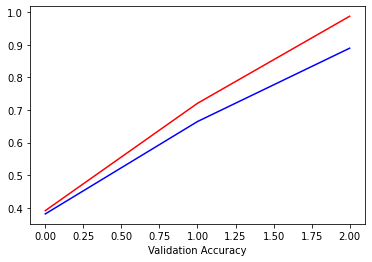

<Figure size 432x288 with 0 Axes>

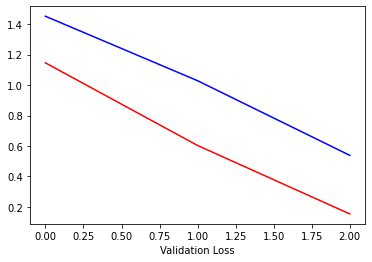

<Figure size 432x288 with 0 Axes>

In [179]:
plot(history_3)

In [180]:
# so i guess this is it .. it was pretty easy i guess ... cause we had normalized the data which made it easy for model to learn faster

In [181]:
# thanks for watching ... and ask whatever you feel free 

In [182]:
# next project in " Can AI learn Random number generating algorithm .. ? "
# see ya later